<a href="https://colab.research.google.com/github/iskra3138/RL/blob/main/Value_Fuction_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

cs234 Mars Rover Example

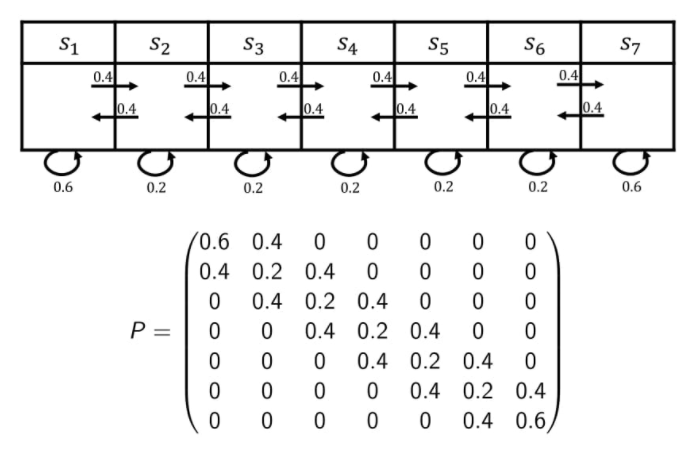

In [2]:
P = np.array ([[0.6,0.4,0,0,0,0,0],
               [0.4,0.2,0.4,0,0,0,0],
               [0,0.4,0.2,0.4,0,0,0],
               [0,0,0.4,0.2,0.4,0,0],
               [0,0,0,0.4,0.2,0.4,0],
               [0,0,0,0,0.4,0.2,0.4],
               [0,0,0,0,0,0.4,0.6]])

In [3]:
R = np.array([1,0,0,0,0,0,10]).reshape((7,1))

## 1. Simulation Based Method

In [16]:
gamma = 0.5
for n in range(7):
  Returns = []
  for i in range(1000):
    s = n
    Return = R[s][0]
    for j in range(20) :
      s = np.random.choice(7, 1, p=P[s])[0]
      Return += gamma**(1+j) * R[s][0]
    Returns.append(Return)
  print (sum(Returns)/len(Returns))

1.5276650037765502
0.38390794372558595
0.1462142868041992
0.19651356315612792
0.8468456707000732
3.5863852701187136
15.370786406517029


## 수리적인 방법

In [17]:
I = np.identity(7)
np.matmul(np.linalg.inv(I - gamma * P), R)

array([[ 1.53426666],
       [ 0.3699333 ],
       [ 0.13043318],
       [ 0.21701603],
       [ 0.84613895],
       [ 3.59060924],
       [15.31160264]])

## Dynamic Programming

In [18]:
V = np.zeros(shape=(7,1))
while True:
  new_V = R + gamma* np.matmul(P,V)
  if (new_V == V).all() :
    break
  else :
    V = new_V
print (new_V)

[[ 1.53426666]
 [ 0.3699333 ]
 [ 0.13043318]
 [ 0.21701603]
 [ 0.84613895]
 [ 3.59060924]
 [15.31160264]]
